In [47]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy as sp
from scipy import stats

# Loading Dataset

In [48]:
# Use Raw Data URL
url = 'https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt'

# Load the set as a Pandas Dataframe
df = pd.read_csv(url, header=None, sep=',')

# Examine first few rows
print(df.head())

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


# Data Exploration

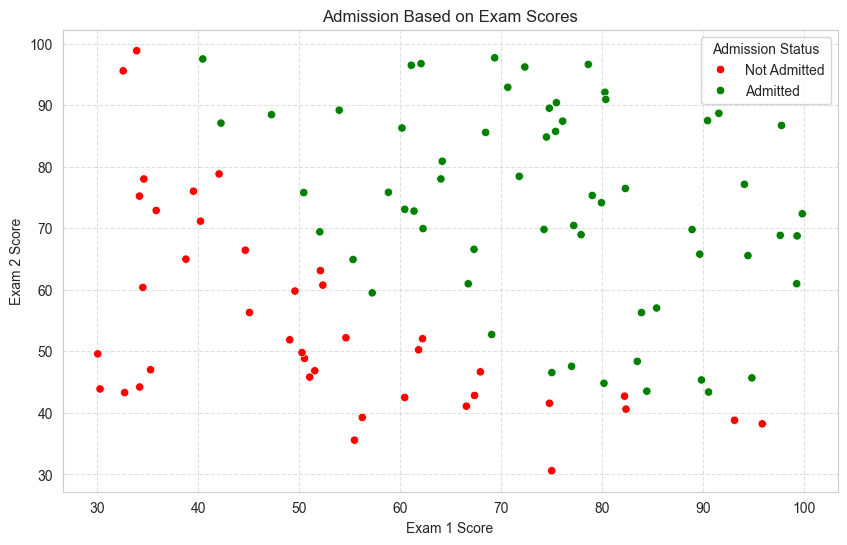

In [49]:
# Define the mapping for labels
label_mapping = {
    0: 'Not Admitted', 
    1: 'Admitted'
}

# Create a new column for the hue
df['Admission_Status_Label'] = df[2].map(label_mapping)

# Define the custom colors (still needed for specific colors)
custom_palette = {'Not Admitted': 'red', 'Admitted': 'green'}

plt.figure(figsize=(10, 6))

# Use the NEW column for hue
sns.scatterplot(
    data=df,
    x=df[0],
    y=df[1],
    hue='Admission_Status_Label', # Use the column with string labels
    palette=custom_palette,       # Use the palette mapped to the new labels
)

plt.legend(title='Admission Status') 
plt.xlabel(xlabel='Exam 1 Score')
plt.ylabel(ylabel='Exam 2 Score')
plt.title('Admission Based on Exam Scores')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [50]:
# Drop Admission_Status_Label Column
df = df.drop(columns='Admission_Status_Label')

# Logistic Regression

## Preparation

In [51]:
# Split the Data into Features (X) and Target (y)
X = df.drop(columns=2)
y = df[2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check to Ensure Split Worked Properly
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


## Training, Fitting, and Predicting

In [52]:
# Fitting Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

## Model Evaluation

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


Confusion Matrix:
 [[ 8  0]
 [ 1 11]]


## Interpretation


- The model was able to accurately predict the admission outcome of 19 out 20 'test subjects', achieving an accuracy score of 95% which is very good.

- The precision score was perfect for admitted (1), meaning the model correctly guessed every student that was admitted, however, it was slightly off for those who were not admitted

- For recall, the model was able to perfectly predict those who were actually not admitted, but was a little inaccurate for those that were admitted. 

- The model scored highly for both the harmonic mean of precision and recall, indicating strong performance across both metrics for both classes.

## Conclusion

The model has a slight tendency to be conservative when predicting admission. In the context of university admissions, this  is a desirable outcome. It's better to tell a qualified student they might not be admitted (False Negative) than to tell an unqualified student they are admitted (False Positive). The model seems to be optimized for avoiding false acceptance.